In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline 

In [52]:
users_data=pd.read_csv("users.dat",sep="::",header=None,names=['UserID','Gender','Age','Occupation','Zipcode'],dtype={'UserID':np.int32,'Gender':np.str,'Age':np.int32,'Occupation':np.int32,'Zipcode':np.str},engine='python')
movie_data=pd.read_csv("movies.dat",sep="::",header=None,names=['MovieID','Title','Genres'],dtype={'MovieID':np.int32,'Title':np.str,'Genres':np.str},engine='python')
ratings_data=pd.read_csv("ratings.dat",sep="::",header=None,names=['UserID','MovieID','Rating','Timestamp'],dtype={'UserID':np.int32,'MovieID':np.int32,'Ratings':np.int32,'Timestamp':np.str},engine='python')

#Presenting datasets

In [92]:
users_data.head(5)

,UserID,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [93]:
movie_data.head(5)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [94]:
ratings_data.head(5)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5.0,978300760
1,1,661,3.0,978302109
2,1,914,3.0,978301968
3,1,3408,4.0,978300275
4,1,2355,5.0,978824291


In [95]:
users_data.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zipcode       0
dtype: int64

In [96]:
    movie_data.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [97]:
ratings_data.isnull().sum()

UserID       0
MovieID      0
Rating       1
Timestamp    1
dtype: int64

In [98]:
ratings_data.dropna(inplace=True)
ratings_data.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [99]:
users_data.shape

(6040, 5)

In [100]:
movie_data.shape

(3883, 3)

In [101]:
ratings_data.shape

(260830, 4)

In [6]:
Master_data=pd.merge(users_data,ratings_data,on='UserID')
Master_data.head()

,UserID,Gender,Age,Occupation,Zipcode,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5.0,978300760
1,1,F,1,10,48067,661,3.0,978302109
2,1,F,1,10,48067,914,3.0,978301968
3,1,F,1,10,48067,3408,4.0,978300275
4,1,F,1,10,48067,2355,5.0,978824291


In [7]:
Master_data=pd.merge(Master_data,movie_data,on='MovieID')
Master_data.head()

,UserID,Gender,Age,Occupation,Zipcode,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5.0,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5.0,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4.0,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4.0,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5.0,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [ ]:
Master_data.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zipcode', 'MovieID', 'Rating',
       'Timestamp', 'Title', 'Genres'],
      dtype='object')

In [104]:
Master_data=Master_data.drop(['Zipcode'],axis=1)
Master_data=Master_data.drop(['Timestamp'],axis=1)

In [ ]:
Master_data=Master_data[['UserID', 'Gender', 'Age', 'Occupation','MovieID', 'Rating','Title', 'Genres']]
Master_data

,UserID,Gender,Age,Occupation,MovieID,Rating,Title,Genres
0,1,F,1,10,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,1193,4.0,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,1193,4.0,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...
260826,1470,M,18,4,3778,2.0,On Our Merry Way (1948),Comedy|Drama
260827,1473,M,25,14,3283,3.0,Minnie and Moskowitz (1971),Action
260828,1564,M,50,1,3283,3.0,Minnie and Moskowitz (1971),Action
260829,1484,M,25,12,884,3.0,Sweet Nothing (1995),Drama


In [ ]:
Age_data=users_data['Age'].value_counts()
Age_data

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: Age, dtype: int64

In [107]:
age_category=('Under 18','18-24','25-34','35-44','45-50','51-55','56+')
x_position=np.arange(len(age_category))
x_position

array([0, 1, 2, 3, 4, 5, 6])

In [108]:
age_val=[Age_data[1],Age_data[18],Age_data[25],Age_data[35],Age_data[45],Age_data[50],Age_data[56]]
age_val

[222, 1103, 2096, 1193, 550, 496, 380]

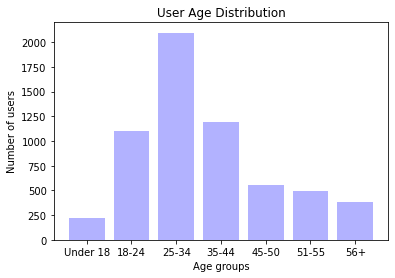

In [109]:
plt.bar(x_position,age_val,align='center',color='b',alpha=0.3)
plt.xlabel('Age groups')
plt.ylabel('Number of users')
plt.xticks(x_position,age_category)
plt.title('User Age Distribution')
plt.show()

In [110]:
movie_data.MovieID[movie_data.Title=='Toy Story (1995)']

0    1
Name: MovieID, dtype: int32

In [12]:
toystory_data=ratings_data[ratings_data.MovieID==1]
toystory_data.head()

,UserID,MovieID,Rating,Timestamp
40,1,1,5.0,978824268
469,6,1,4.0,978237008
581,8,1,4.0,978233496
711,9,1,5.0,978225952
837,10,1,5.0,978226474


In [13]:
toystory_data1=toystory_data.groupby('Rating').size()
toystory_data1

Rating
1.0      2
2.0     18
3.0     92
4.0    219
5.0    209
dtype: int64

In [ ]:
ratings=('1','2','3','4','5')
x_pos=np.arange(len(ratings))
x_pos

array([0, 1, 2, 3, 4])

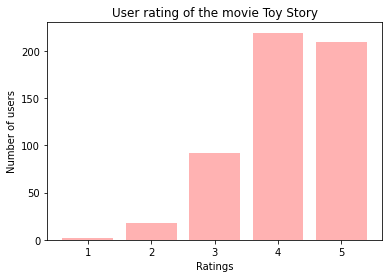

In [ ]:
plt.bar(x_pos,toystory_data1,align='center',color='r',alpha=0.3)
plt.xlabel('Ratings')
plt.ylabel('Number of users')
plt.xticks(x_pos,ratings)
plt.title('User rating of the movie Toy Story')
plt.show()

In [118]:
movie_ratings=Master_data.groupby(['Title'],as_index=False)
avg_movie_ratings=movie_ratings.agg({'Rating':'mean'})
avg_movie_ratings.head(25)

,Title,Rating
0,"$1,000,000 Duck (1971)",3.375000
1,'Night Mother (1986),3.307692
2,'Til There Was You (1997),2.750000
3,"'burbs, The (1989)",2.873418
4,...And Justice for All (1979),3.651163
5,10 Things I Hate About You (1999),3.352332
6,101 Dalmatians (1961),3.591549
7,101 Dalmatians (1996),2.934783
8,12 Angry Men (1957),4.320988
9,"13th Warrior, The (1999)",3.124352


In [119]:
top_25=avg_movie_ratings.sort_values('Rating',ascending=False).head(25)
top_25

,Title,Rating
874,Devil Girl From Mars (1954),5.000000
1568,I Stand Alone (Seul contre tous) (1998),5.000000
259,"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.000000
1806,"Last September, The (1999)",5.000000
3219,Time of the Gypsies (Dom za vesanje) (1989),5.000000
399,Black Sunday (La Maschera Del Demonio) (1960),5.000000
3190,Those Who Love Me Can Take the Train (Ceux qui...,5.000000
2332,On Any Sunday (1971),5.000000
378,"Big Trees, The (1952)",5.000000
1518,"Hour of the Pig, The (1993)",5.000000


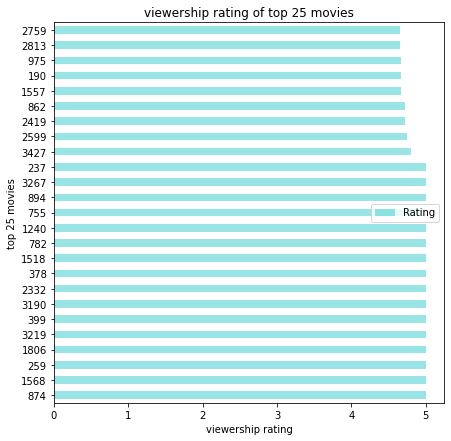

In [120]:
top_25.plot(kind='barh',alpha=0.4,color='c',figsize=(7,7))
plt.xlabel('viewership rating')
plt.ylabel('top 25 movies')
plt.title('viewership rating of top 25 movies')
plt.show()

In [123]:
Master_data[Master_data['UserID']==2696]

,UserID,Gender,Age,Occupation,MovieID,Rating,Title,Genres


In [ ]:
As Master data has no userID 2696,userID 196 has been picked coservatively.

In [124]:
user_rating=Master_data[Master_data['UserID']==196]
user_rating=user_rating[['UserID','MovieID','Title','Rating']]
user_rating.head(20)

,UserID,MovieID,Title,Rating
50,196,1193,One Flew Over the Cuckoo's Nest (1975),4.0
10131,196,2762,"Sixth Sense, The (1999)",5.0
15086,196,608,Fargo (1996),5.0
19728,196,1213,GoodFellas (1990),5.0
26563,196,1834,"Spanish Prisoner, The (1997)",4.0
28428,196,2858,American Beauty (1999),5.0
36123,196,593,"Silence of the Lambs, The (1991)",3.0
58612,196,1240,"Terminator, The (1984)",5.0
63296,196,296,Pulp Fiction (1994),5.0
63900,196,1617,L.A. Confidential (1997),3.0


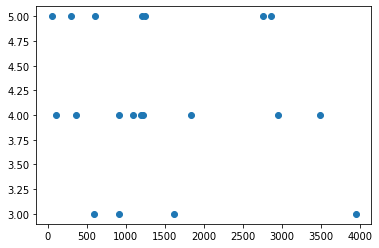

In [125]:
plt.scatter(x=user_rating['MovieID'].head(20),y=user_rating['Rating'].head(20))
plt.show()

In [126]:
genres=Master_data['Genres'].str.split("|")
genres

0                 [Drama]
1                 [Drama]
2                 [Drama]
3                 [Drama]
4                 [Drama]
               ...       
260825    [Comedy, Drama]
260826           [Action]
260827           [Action]
260828            [Drama]
260829           [Horror]
Name: Genres, Length: 260830, dtype: object

In [129]:
unq_genres=set()
for gen in genres:
      unq_genres=unq_genres.union(set(gen))

In [130]:
unq_genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [131]:
onehot=Master_data["Genres"].str.get_dummies("|")
onehot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [132]:
onehot=pd.concat([Master_data,onehot],axis=1)
onehot.head()

,UserID,Gender,Age,Occupation,MovieID,Rating,Title,Genres,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,F,1,10,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,M,56,16,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,M,25,12,1193,4.0,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,M,25,7,1193,4.0,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,M,50,1,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
onehot.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'MovieID', 'Rating', 'Title',
       'Genres', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [133]:
Master_data[["Title","Year"]] = Master_data.Title.str.extract("(.)\s\((.\d+)",expand=True)
Master_data

,UserID,Gender,Age,Occupation,MovieID,Rating,Title,Genres,Year
0,1,F,1,10,1193,5.0,t,Drama,1975
1,2,M,56,16,1193,5.0,t,Drama,1975
2,12,M,25,12,1193,4.0,t,Drama,1975
3,15,M,25,7,1193,4.0,t,Drama,1975
4,17,M,50,1,1193,5.0,t,Drama,1975
...,...,...,...,...,...,...,...,...,...
260825,1470,M,18,4,3778,2.0,y,Comedy|Drama,1948
260826,1473,M,25,14,3283,3.0,z,Action,1971
260827,1564,M,50,1,3283,3.0,z,Action,1971
260828,1484,M,25,12,884,3.0,g,Drama,1995


In [134]:
Feature_data=Master_data
Feature_data

,UserID,Gender,Age,Occupation,MovieID,Rating,Title,Genres,Year
0,1,F,1,10,1193,5.0,t,Drama,1975
1,2,M,56,16,1193,5.0,t,Drama,1975
2,12,M,25,12,1193,4.0,t,Drama,1975
3,15,M,25,7,1193,4.0,t,Drama,1975
4,17,M,50,1,1193,5.0,t,Drama,1975
...,...,...,...,...,...,...,...,...,...
260825,1470,M,18,4,3778,2.0,y,Comedy|Drama,1948
260826,1473,M,25,14,3283,3.0,z,Action,1971
260827,1564,M,50,1,3283,3.0,z,Action,1971
260828,1484,M,25,12,884,3.0,g,Drama,1995


In [135]:
Feature_data["Year"] =Feature_data.Year.astype(int)
Feature_data['Movie_Age'] = 2000-Feature_data['Year']
Feature_data

,UserID,Gender,Age,Occupation,MovieID,Rating,Title,Genres,Year,Movie_Age
0,1,F,1,10,1193,5.0,t,Drama,1975,25
1,2,M,56,16,1193,5.0,t,Drama,1975,25
2,12,M,25,12,1193,4.0,t,Drama,1975,25
3,15,M,25,7,1193,4.0,t,Drama,1975,25
4,17,M,50,1,1193,5.0,t,Drama,1975,25
...,...,...,...,...,...,...,...,...,...,...
260825,1470,M,18,4,3778,2.0,y,Comedy|Drama,1948,52
260826,1473,M,25,14,3283,3.0,z,Action,1971,29
260827,1564,M,50,1,3283,3.0,z,Action,1971,29
260828,1484,M,25,12,884,3.0,g,Drama,1995,5


In [136]:
Feature_data['Gender']=Feature_data.Gender.replace('F',1)
Feature_data['Gender']=Feature_data.Gender.replace('M',0)
Feature_data['Gender']=Feature_data.Gender.astype(int)
Feature_data.head()

,UserID,Gender,Age,Occupation,MovieID,Rating,Title,Genres,Year,Movie_Age
0,1,1,1,10,1193,5.0,t,Drama,1975,25
1,2,0,56,16,1193,5.0,t,Drama,1975,25
2,12,0,25,12,1193,4.0,t,Drama,1975,25
3,15,0,25,7,1193,4.0,t,Drama,1975,25
4,17,0,50,1,1193,5.0,t,Drama,1975,25


In [55]:
Feature_data[['Gender','Occupation','Age','Movie_Age']].corrwith(Feature_data['Rating'])

Gender       -0.001756
Occupation   -0.016255
Age           0.067170
Movie_Age     0.170418
dtype: float64

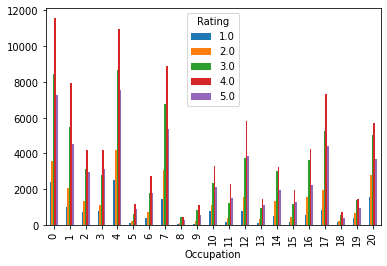

In [137]:
Feature_data.groupby(['Occupation','Rating']).size().unstack().plot(kind="bar",stacked=False,legend=True)
plt.show()

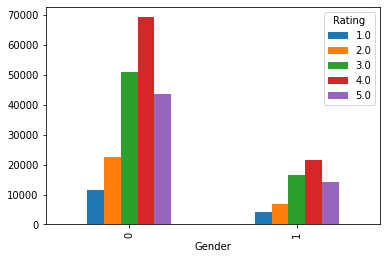

In [138]:
Feature_data.groupby(['Gender','Rating']).size().unstack().plot(kind="bar",stacked=False,legend=True)
plt.show()

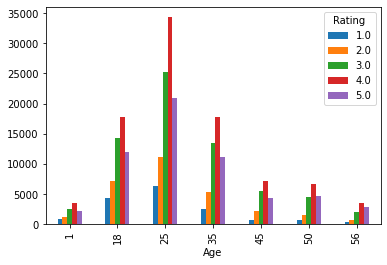

In [139]:
Feature_data.groupby(['Age','Rating']).size().unstack().plot(kind="bar",stacked=False,legend=True)
plt.show()

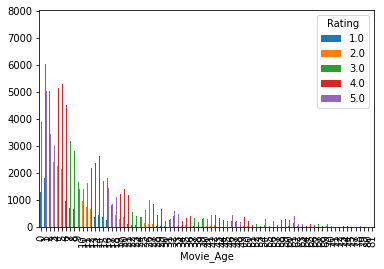

In [140]:
Feature_data.groupby(['Movie_Age','Rating']).size().unstack().plot(kind="bar",stacked=False,legend=True)
plt.show()

In [141]:
x=Master_data[['Age','Occupation','MovieID']].head(500)
x

,Age,Occupation,MovieID
0,1,10,1193
1,56,16,1193
2,25,12,1193
3,25,7,1193
4,50,1,1193
...,...,...,...
495,35,7,661
496,25,0,661
497,25,12,661
498,35,7,661


In [142]:
y=Master_data['Rating'].head(500)
y

0      5.0
1      5.0
2      4.0
3      4.0
4      5.0
      ... 
495    4.0
496    3.0
497    3.0
498    1.0
499    3.0
Name: Rating, Length: 500, dtype: float64

In [76]:
x.shape

(500, 3)

In [75]:
y.shape

(500,)

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.4)

In [145]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
y_pred

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [146]:
from sklearn.metrics import accuracy_score,classification_report

In [147]:
accuracy_score(y_test,y_pred)

0.495

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00        19
         4.0       0.00      0.00      0.00        74
         5.0       0.49      1.00      0.66        99

    accuracy                           0.49       200
   macro avg       0.10      0.20      0.13       200
weighted avg       0.25      0.49      0.33       200



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
**END**